In [1]:
import numpy as np  # 调用numpy
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
air_hgt_500 = xr.open_dataset('D:\\python\\tianzhen\\shixi2\\all.nc')
lat = air_hgt_500['lat'][:]
lon = air_hgt_500['lon'][:]
lons, lats = np.meshgrid(lon, lat)  # 后面画图数据对应

In [3]:
def createmap():
    ####生成地图#########
    box = [50, 160, 10, 80]  # 经度维度
    scale = '110m'  # 地图分辨率
    xstep = 10  # 下面标注经纬度的步长
    ystep = 10
    proj = ccrs.PlateCarree()
    fig = plt.figure(figsize=(8, 10))  # dpi=150)###生成底图
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})

    ax.set_extent(box, crs=ccrs.PlateCarree())
    ##设置大陆的颜色，1为白，0为黑
    # land=cfeat.NaturalEarthFeature('physical','land',scale,edgecolor='face',facecolor=cfeat.COLORS['land'])
    # ax.add_feature(land,facecolor='0.75')
    ##海岸线
    ax.coastlines(scale)
    # 标注坐标轴
    ax.set_xticks(np.arange(box[0], box[1] + xstep, xstep), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2], box[3] + ystep, ystep), crs=ccrs.PlateCarree())
    # 经纬度格式，把0经度设置不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    return ax,fig

D:\anaconda\envs\py310\lib\site-packages\cartopy\mpl\geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


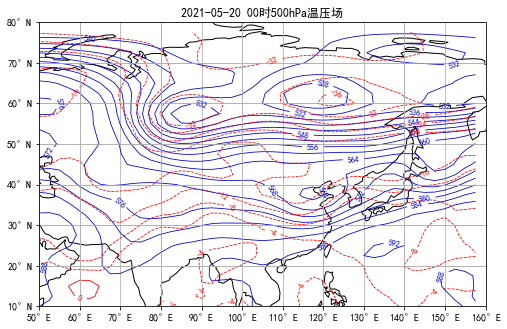

In [17]:
ax,fig=createmap()
###绘制500hPa温压场
###读取数据
plot_air_500 = air_hgt_500['air'][0, 5, :, :]
plot_hgt_500 = air_hgt_500['hgt'][0, 5, :, :]

air_levels = np.arange(-100, 20, 4)  # 设置等值线间隔
hgt_levels = np.arange(400, 600, 4)
#
denghgtlines = ax.contour(lons[0:28, 0:44], lats[0:28, 0:44], plot_hgt_500[0:28, 0:44], levels=hgt_levels,
                          colors='mediumblue', linewidths=0.8)

plt.clabel(denghgtlines, inline=True, fontsize=8, fmt='%.0f')
dengairlines = ax.contour(lons[0:28, 0:44], lats[0:28, 0:44], plot_air_500[0:28, 0:44], levels=air_levels,
                          colors='red', linewidths=0.8, linestyle=np.where(plot_air_500 <= 0, '--', '--'))
plt.clabel(dengairlines, inline=True, fontsize=8, fmt='%.0f')
ax.set_title('2021-05-20 00时500hPa温压场', fontsize=12)

gl = ax.gridlines()  ##生成网格线
ax.grid()
plt.show()

In [8]:
help(np.where)

Help on function where in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called when x an

In [12]:
np.where(plot_air_500 <= 0, '-', '--')

array([['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ...,
       ['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-']], dtype='<U2')

In [11]:
plot_air_500

<xarray.DataArray 'air' (lat: 29, lon: 45)>
array([[ -3.16,  -2.56,  -2.46, ...,  -3.46,  -3.36,  -2.86],
       [ -2.26,  -1.76,  -1.46, ...,  -3.66,  -3.66,  -3.16],
       [ -2.26,  -1.66,  -1.06, ...,  -4.36,  -4.26,  -3.96],
       ...,
       [-23.56, -23.76, -24.06, ..., -31.26, -31.16, -31.16],
       [-28.46, -28.66, -28.86, ..., -31.46, -31.46, -31.56],
       [-32.76, -32.76, -32.86, ..., -32.16, -32.16, -32.16]])
Coordinates:
  * lon      (lon) float64 50.0 52.5 55.0 57.5 60.0 ... 152.5 155.0 157.5 160.0
  * lat      (lat) float64 10.0 12.5 15.0 17.5 20.0 ... 70.0 72.5 75.0 77.5 80.0
    time     datetime64[ns] 2021-05-20
    level    float64 500.0